# Deep Learning Background

# Hand-Written Digits Classifier

 Since sigmoid is being used as activation function, the output is between 0 and 1

## How do we supply the picture of 4 into the neural network

- Essentially, each image is a 2-d matrix with each pixel representing a value between 0 & 255
- Then, we can flatten the array from 2-d to 1-d to supply 7 x 7 matrix as x0-x49 to determine outputs

## Code for creating Neural Network to classify hand digits

In [1]:
# pip install tensorflow

## Import the packages

In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Import the train and testing data

In [3]:
train_digits = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_digits = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [4]:
X_train = train_digits.drop(columns=["label"])
y_train = train_digits["label"]

In [5]:
test_digits["Image-Id"] = [i+1 for i in range(28000)]
X_test = test_digits.drop(columns=["Image-Id"])

Shape of the training set

In [6]:
X_train.shape

(42000, 784)

Shape of test set

In [7]:
X_test.shape

(28000, 784)

Check the 10th image in matplotlib

## Convert train and test to array

In [8]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)

## Sample plot of image

6

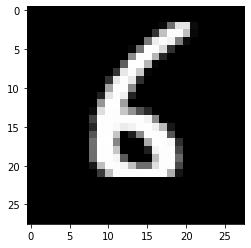

In [9]:
plt.imshow(X_train[45].reshape((28,28)),cmap = "gray")
y_train[45]

Confirm that the label is correct

## Scale the training data

In [10]:
X_train = X_train/255;
X_test = X_test/255;

## Reshape the data into 1-d

In [11]:
X_train_flattened = X_train.reshape(len(X_train),28*28)

In [12]:
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [13]:
X_test_flattened.shape

(28000, 784)

In [14]:
X_test_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Create Simple Neural Network

Creating stack of neural network

Dense layer is added to include connections of all neurons

Input shape is 784 neurons & Output shape is 10

Optimizer helps to reach to global minima

Loss function has sparse(output is integer), and output is categorical label

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784,),activation ='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened,y_train,epochs = 5)

2022-04-09 20:08:17.373041: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-04-09 20:08:17.699835: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5203 - accuracy: 0.8659
Epoch 2/5
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3143 - accuracy: 0.9128
Epoch 3/5
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2873 - accuracy: 0.9197
Epoch 4/5
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2740 - accuracy: 0.9226
Epoch 5/5
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2654 - accuracy: 0.9254


## Make predictions on model

In [16]:
y_predict_dense = model.predict(X_test_flattened)

In [17]:
y_predict_dense

array([[2.06975579e-01, 1.12038344e-10, 9.99938905e-01, ...,
        3.90028654e-05, 5.26308417e-02, 3.54379416e-04],
       [9.99945760e-01, 2.54233212e-09, 1.81488544e-01, ...,
        4.18630242e-03, 2.96445191e-02, 2.46904838e-05],
       [1.31019950e-03, 1.23317540e-02, 1.09941632e-01, ...,
        9.89002287e-02, 5.46902061e-01, 9.31110919e-01],
       ...,
       [2.23174691e-03, 4.31290269e-03, 3.85804474e-02, ...,
        1.09783202e-01, 7.63906002e-01, 7.20608830e-02],
       [1.09463930e-03, 1.04330147e-05, 4.75615263e-04, ...,
        7.92698562e-02, 2.39169002e-01, 9.95393157e-01],
       [3.42404842e-02, 4.80878892e-09, 9.97108400e-01, ...,
        4.61764193e-06, 5.34968376e-02, 1.95389986e-02]], dtype=float32)

In [18]:
y_predicted_labels = [np.argmax(i) for i in y_predict_dense]

## Create CSV and upload

In [19]:
df = pd.DataFrame({"ImageId":test_digits["Image-Id"],"Label":y_predicted_labels})

In [20]:
# df.to_csv("submission.csv",index=False)

In [21]:
df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,7
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


## Make Predictions on model

In [22]:
y_predict = model.predict(X_test_flattened)

Use argmax to find index of highest probability in predictions

In [23]:
np.argmax(y_predict[8])

0

## Look at confusion matrix

In [24]:
y_predicted_labels = [np.argmax(i) for i in y_predict]

In [25]:
# y_predicted_labels

In [26]:
import seaborn as sns

> Anything not in diagonal is considered an error

In [27]:
# cm = tf.math.confusion_matrix(labels= y_test,predictions = y_predicted_labels)
# sns.heatmap(cm,annot = True,fmt = 'd')
# plt.xlabel('Predicted')
# plt.ylabel('True')

## Add Hidden Layer

Specify # of hidden layers

In [28]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape = (784,),activation ='relu'),
    keras.layers.Dense(10,activation ='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy','mse']
)

model.fit(X_train_flattened,y_train,epochs = 10)

Epoch 1/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3093 - accuracy: 0.9118 - mse: 25.1759
Epoch 2/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1448 - accuracy: 0.9571 - mse: 25.5655
Epoch 3/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1015 - accuracy: 0.9695 - mse: 25.7325
Epoch 4/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0769 - accuracy: 0.9777 - mse: 25.9384
Epoch 5/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0609 - accuracy: 0.9813 - mse: 26.0622
Epoch 6/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0480 - accuracy: 0.9854 - mse: 26.1680
Epoch 7/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0385 - accuracy: 0.9886 - mse: 26.2773
Epoch 8/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0309 - accuracy: 0.9908 - mse: 26.3300
Epoch 9/10
1313/1313 [==============================] - 2s 2ms/s

In [29]:
y_predict = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predict]

In [30]:
df = pd.DataFrame({"ImageId":test_digits["Image-Id"],"Label":y_predicted_labels})
df.to_csv("submission.csv",index=False)

In [31]:
# for i in range(20):
#     plt.figure()
#     plt.imshow(X_test[i].reshape(28,28))
#     plt.title(y_predicted_labels[i])

## Can add flatten layer to remove flattened array

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100,activation ='relu'),
    keras.layers.Dense(10,activation ='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train,y_train,epochs = 5)

Epoch 1/5
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3060 - accuracy: 0.9120
Epoch 2/5
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1361 - accuracy: 0.9602
Epoch 3/5
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0958 - accuracy: 0.9714
Epoch 4/5
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0736 - accuracy: 0.9780
Epoch 5/5
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0569 - accuracy: 0.9831


## Try different optimizers and loss functions